In [2]:
import pandas as pd
df = pd.read_csv("housing.csv")

print(df.head())
print(df.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [3]:
print(df.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
print(df.shape)

(20640, 10)


In [6]:
# Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu v√† s·ªë gi√° tr·ªã null
print(df.info())

# Th·ªëng k√™ c∆° b·∫£n c·ªßa d·ªØ li·ªáu s·ªë
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


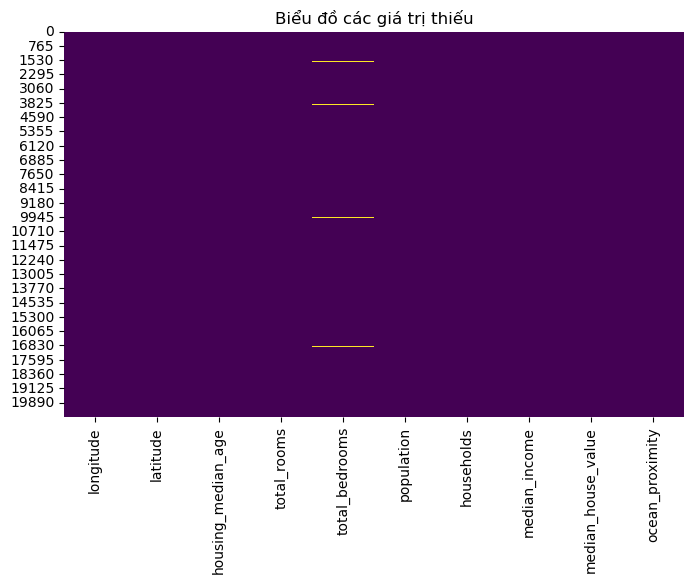

In [7]:
# Ki·ªÉm tra s·ªë l∆∞·ª£ng gi√° tr·ªã thi·∫øu
print(df.isnull().sum())

# V·∫Ω bi·ªÉu ƒë·ªì missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Bi·ªÉu ƒë·ªì c√°c gi√° tr·ªã thi·∫øu")
plt.show()


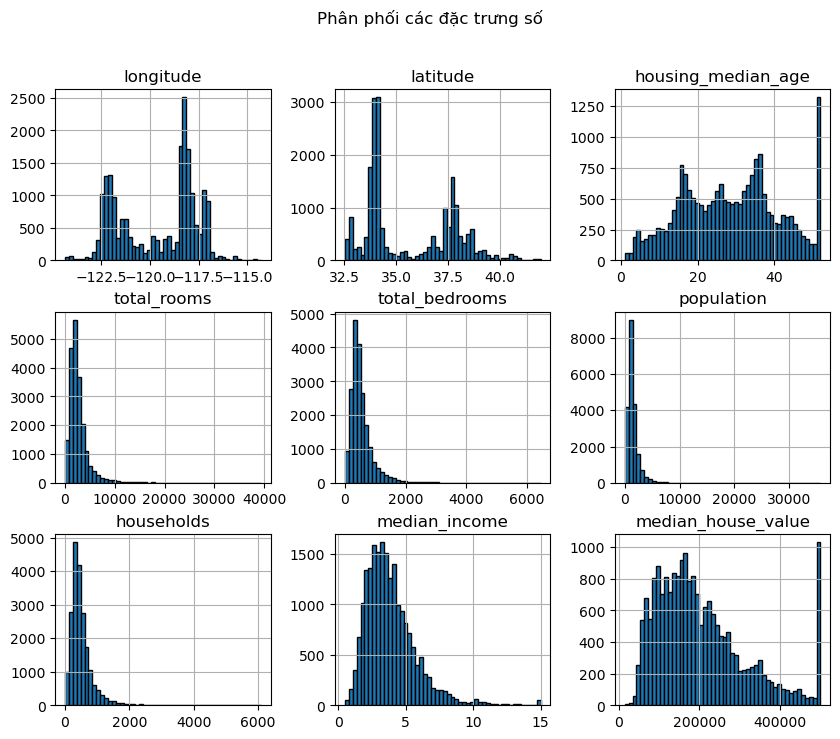

In [8]:
df.hist(figsize=(10, 8), bins=50, edgecolor="black")
plt.suptitle("Ph√¢n ph·ªëi c√°c ƒë·∫∑c tr∆∞ng s·ªë")
plt.show()


In [11]:
import numpy as np

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Ma tr·∫≠n t∆∞∆°ng quan")
plt.show()


ValueError: could not convert string to float: 'NEAR BAY'

<Figure size 1000x800 with 0 Axes>

In [12]:
# Thay th·∫ø gi√° tr·ªã thi·∫øu trong total_bedrooms b·∫±ng median
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


In [13]:
# M√£ h√≥a one-hot encoding cho ocean_proximity
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)


In [14]:
from sklearn.preprocessing import StandardScaler

# Ch·ªçn c√°c c·ªôt s·ªë ƒë·ªÉ chu·∫©n h√≥a
num_features = ["total_rooms", "total_bedrooms", "population", "households", "median_income"]
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])


In [15]:
# Ki·ªÉm tra l·∫°i xem c√≤n gi√° tr·ªã thi·∫øu kh√¥ng
print(df.isnull().sum())


longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [16]:
# Xem danh s√°ch c√°c c·ªôt sau khi one-hot encoding
print(df.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [17]:
# Ki·ªÉm tra th·ªëng k√™ d·ªØ li·ªáu sau khi chu·∫©n h√≥a
print(df.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  2.064000e+04   
mean    -119.569704     35.631861           28.639486  3.201573e-17   
std        2.003532      2.135952           12.585558  1.000024e+00   
min     -124.350000     32.540000            1.000000 -1.207283e+00   
25%     -121.800000     33.930000           18.000000 -5.445698e-01   
50%     -118.490000     34.260000           29.000000 -2.332104e-01   
75%     -118.010000     37.710000           37.000000  2.348028e-01   
max     -114.310000     41.950000           52.000000  1.681558e+01   

       total_bedrooms    population    households  median_income  \
count    2.064000e+04  2.064000e+04  2.064000e+04   2.064000e+04   
mean    -9.363741e-17 -1.101617e-17  6.885104e-17   6.609700e-17   
std      1.000024e+00  1.000024e+00  1.000024e+00   1.000024e+00   
min     -1.277688e+00 -1.256123e+00 -1.303984e+00  -1.774299e+00   
25%     -5.718868e-0

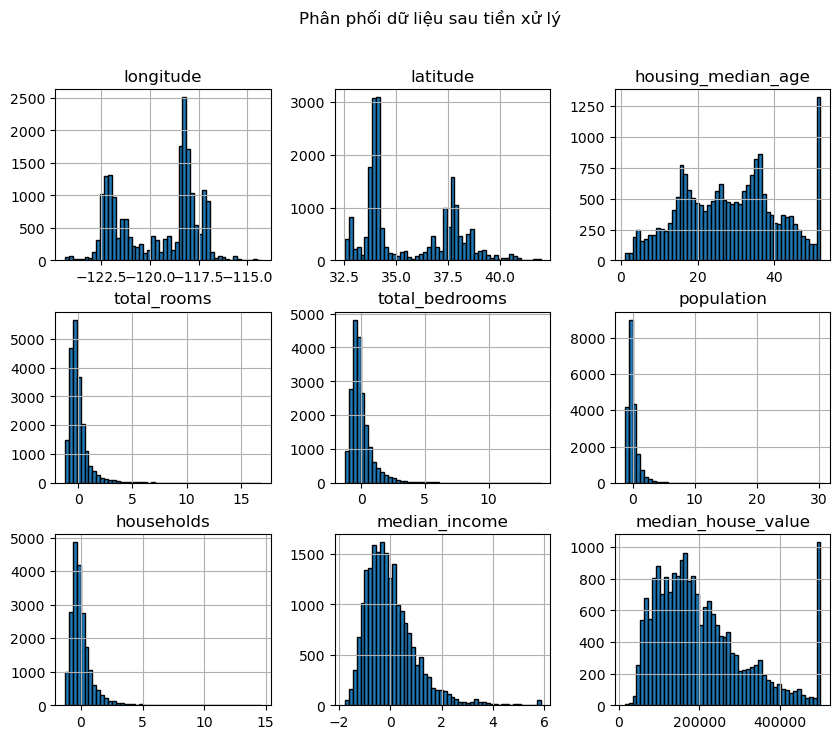

In [18]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 8), bins=50, edgecolor="black")
plt.suptitle("Ph√¢n ph·ªëi d·ªØ li·ªáu sau ti·ªÅn x·ª≠ l√Ω")
plt.show()


In [20]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/43/80/0b5a2dfcf5b4da27b0b68d2833f05d77e1a374d43db951fca200a1f12a52/xgboost-2.1.4-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 653.6 kB/s eta 0:03:11
   ---------------------------------------- 0.1/124.9 MB 944.1 kB/s eta 0:02:13
   ---------------------------------------- 0.2/124.9 MB 1.2 MB/s eta 0:01:45
   ---------------------------------------- 0.5/124.9 MB 2.0 MB/s eta 0:01:03
   ---------------------------------------- 0.9/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 1.4/124.9 MB 4.4 MB/s eta 0:00:29
    --------------------------------------- 2.3/124.9 MB 6.2 MB/s eta 0:00:20
   - ------------------

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [23]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"üîπ {model_name}:")
    print(f"   - MAE  (Mean Absolute Error): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"   - RMSE (Root Mean Squared Error): {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"   - R¬≤ Score: {r2_score(y_true, y_pred):.4f}")
    print("-" * 40)


In [25]:

# X√°c ƒë·ªãnh bi·∫øn ƒë·∫ßu v√†o (features) v√† bi·∫øn m·ª•c ti√™u (label)
X = df.drop(columns=["median_house_value"])  # Lo·∫°i b·ªè c·ªôt m·ª•c ti√™u
y = df["median_house_value"]  # Ch·ªâ l·∫•y c·ªôt m·ª•c ti√™u

In [26]:
from sklearn.model_selection import train_test_split

# Chia d·ªØ li·ªáu th√†nh 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ki·ªÉm tra k√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi chia
print("K√≠ch th∆∞·ªõc t·∫≠p hu·∫•n luy·ªán:", X_train.shape, y_train.shape)
print("K√≠ch th∆∞·ªõc t·∫≠p ki·ªÉm tra:", X_test.shape, y_test.shape)


K√≠ch th∆∞·ªõc t·∫≠p hu·∫•n luy·ªán: (16512, 12) (16512,)
K√≠ch th∆∞·ªõc t·∫≠p ki·ªÉm tra: (4128, 12) (4128,)


In [27]:
# Kh·ªüi t·∫°o m√¥ h√¨nh
lr_model = LinearRegression()

# Hu·∫•n luy·ªán m√¥ h√¨nh
lr_model.fit(X_train, y_train)

# D·ª± ƒëo√°n tr√™n t·∫≠p test
y_pred_lr = lr_model.predict(X_test)

# ƒê√°nh gi√° m√¥ h√¨nh
evaluate_model(y_test, y_pred_lr, "Linear Regression")


üîπ Linear Regression:
   - MAE  (Mean Absolute Error): 50670.74
   - RMSE (Root Mean Squared Error): 70060.52
   - R¬≤ Score: 0.6254
----------------------------------------


In [29]:
# Kh·ªüi t·∫°o m√¥ h√¨nh
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Hu·∫•n luy·ªán m√¥ h√¨nh
rf_model.fit(X_train, y_train)

# D·ª± ƒëo√°n tr√™n t·∫≠p test
y_pred_rf = rf_model.predict(X_test)

# ƒê√°nh gi√° m√¥ h√¨nh
evaluate_model(y_test, y_pred_rf, "Random Forest")


üîπ Random Forest:
   - MAE  (Mean Absolute Error): 31640.11
   - RMSE (Root Mean Squared Error): 49035.00
   - R¬≤ Score: 0.8165
----------------------------------------


In [31]:
# Kh·ªüi t·∫°o m√¥ h√¨nh
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Hu·∫•n luy·ªán m√¥ h√¨nh
xgb_model.fit(X_train, y_train)

# D·ª± ƒëo√°n tr√™n t·∫≠p test
y_pred_xgb = xgb_model.predict(X_test)

# ƒê√°nh gi√° m√¥ h√¨nh
evaluate_model(y_test, y_pred_xgb, "XGBoost")


üîπ XGBoost:
   - MAE  (Mean Absolute Error): 31645.73
   - RMSE (Root Mean Squared Error): 47309.13
   - R¬≤ Score: 0.8292
----------------------------------------
